In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [17]:
Groceries_df = pd.read_csv('Groceries_dataset.csv')
Groceries_df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [21]:
Groceries_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [23]:
Groceries_df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [19]:
Groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [25]:
Groceries_df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [27]:
Groceries_df.isnull()

,Member_number,Date,itemDescription
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
38760,False,False,False
38761,False,False,False
38762,False,False,False
38763,False,False,False


In [29]:
Groceries_df.sum()

Member_number                                              116436177
Date               21-07-201505-01-201519-09-201512-12-201501-02-...
itemDescription    tropical fruitwhole milkpip fruitother vegetab...
dtype: object

In [36]:
Groceries_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [42]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

data = [
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'apple'],
    ['bread', 'apple'],
    ['milk', 'bread', 'apple', 'nuts']
]

df = pd.DataFrame([{item: (item in row) for item in set(sum(data, []))} for row in data])
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

print("Frequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
    support             itemsets
0      0.6              (apple)
1      0.8              (bread)
2      0.8               (milk)
3      0.4               (nuts)
4      0.4       (apple, bread)
5      0.4        (apple, milk)
6      0.6        (bread, milk)
7      0.4        (bread, nuts)
8      0.4         (nuts, milk)
9      0.4  (bread, milk, nuts)


In [44]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = [['milk', 'bread', 'nuts'], ['milk', 'bread'], ['milk', 'apple'], ['bread', 'apple'], ['milk', 'bread', 'apple', 'nuts']]
df = pd.DataFrame([{item: item in row for item in set(sum(data, []))} for row in data])
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

     antecedents    consequents  antecedent support  consequent support  \
0        (bread)         (nuts)                 0.8                 0.4   
1         (nuts)        (bread)                 0.4                 0.8   
2         (nuts)         (milk)                 0.4                 0.8   
3         (milk)         (nuts)                 0.8                 0.4   
4  (bread, milk)         (nuts)                 0.6                 0.4   
5  (bread, nuts)         (milk)                 0.4                 0.8   
6   (nuts, milk)        (bread)                 0.4                 0.8   
7        (bread)   (nuts, milk)                 0.8                 0.4   
8         (milk)  (bread, nuts)                 0.8                 0.4   
9         (nuts)  (bread, milk)                 0.4                 0.6   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.4    0.500000  1.250000               1.0      0.08         1.2   
1      0.4    1.000000

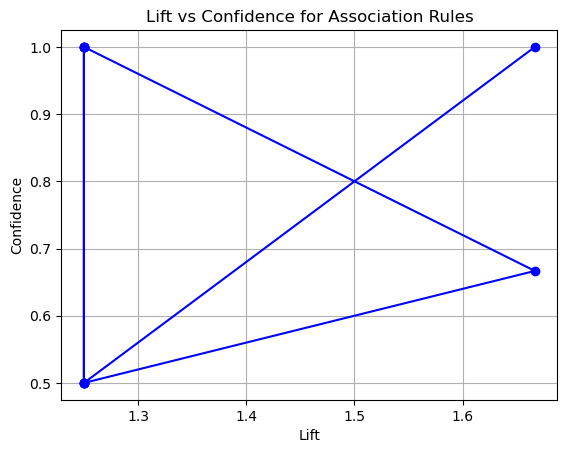

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

data = [['milk', 'bread', 'nuts'], ['milk', 'bread'], ['milk', 'apple'], ['bread', 'apple'], ['milk', 'bread', 'apple', 'nuts']]

df = pd.DataFrame([{item: item in row for item in set(sum(data, []))} for row in data])
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

plt.plot(rules['lift'], rules['confidence'], marker='o', linestyle='-', color='b')
plt.title('Lift vs Confidence for Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


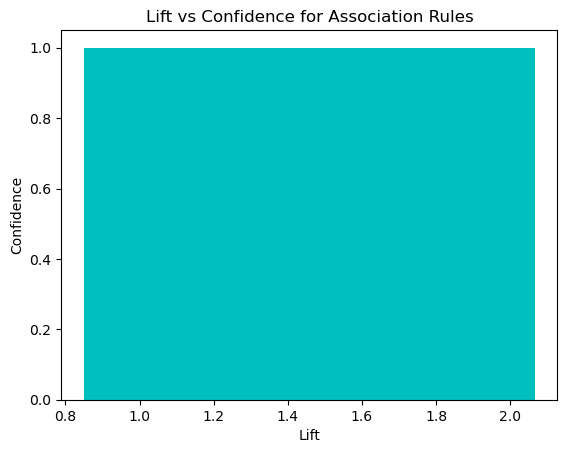

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
 
data = [['milk', 'bread', 'nuts'], ['milk', 'bread'], ['milk', 'apple'], ['bread', 'apple'], ['milk', 'bread', 'apple', 'nuts']]

 
df = pd.DataFrame([{item: item in row for item in set(sum(data, []))} for row in data])
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
 
plt.bar(rules['lift'], rules['confidence'], color='c')
plt.title('Lift vs Confidence for Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()


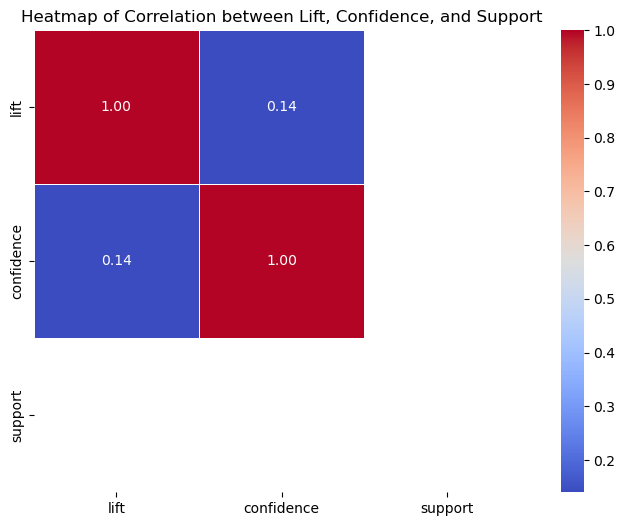

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
data = [['milk', 'bread', 'nuts'], ['milk', 'bread'], ['milk', 'apple'], ['bread', 'apple'], ['milk', 'bread', 'apple', 'nuts']]
 
df = pd.DataFrame([{item: item in row for item in set(sum(data, []))} for row in data])
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

heatmap_data = rules[['lift', 'confidence', 'support']]
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation between Lift, Confidence, and Support')
plt.show()
